In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import datetime

pd.set_option('display.max_columns', None)

In [2]:
bp_data = pd.read_csv('./BP_Log.csv')
bp_data.tail()

,Date,DoW,BP1,BP2,BP3
180,2023-10-05,Thursday,140/102 - 79,142/97 - 79,141/99 - 77
181,2023-10-06,Friday,135/92 - 70,136/91 - 74,130/92 - 73
182,2023-10-07,Saturday,141/87 - 83,136/82 - 80,131/85 - 75
183,2023-10-08,Sunday,NaN,NaN,NaN
184,2023-10-09,Monday,NaN,NaN,NaN


In [3]:
df = bp_data.copy()
df = df[~df['BP1'].isna()]

df['sys1'] = pd.DataFrame(df['BP1'].str.split('/').to_list(), columns = ['sys', 'delme'])['sys'].astype('float64')
df['sys2'] = pd.DataFrame(df['BP2'].str.split('/').to_list(), columns = ['sys', 'delme'])['sys'].astype('float64')
df['sys3'] = pd.DataFrame(df['BP3'].str.split('/').to_list(), columns = ['sys', 'delme'])['sys'].astype('float64')
df['mn_sys'] = (df['sys1'] + df['sys2'] + df['sys3']) / 3

dia1tmp = pd.DataFrame(df['BP1'].str.split('/').to_list(), columns = ['sys', 'delme'])['delme'].str.split('-').to_list()
df['di1'] = pd.DataFrame(dia1tmp)[0].astype('float64')
dia2tmp = pd.DataFrame(df['BP2'].str.split('/').to_list(), columns = ['sys', 'delme'])['delme'].str.split('-').to_list()
df['di2'] = pd.DataFrame(dia2tmp)[0].astype('float64')
dia3tmp = pd.DataFrame(df['BP3'].str.split('/').to_list(), columns = ['sys', 'delme'])['delme'].str.split('-').to_list()
df['di3'] = pd.DataFrame(dia3tmp)[0].astype('float64')

df['mn_di'] = (df['di1'] + df['di2'] + df['di3']) / 3

df

,Date,DoW,BP1,BP2,BP3,sys1,sys2,sys3,mn_sys,di1,di2,di3,mn_di
0,2023-04-08,Saturday,121/84 - 66,124/86 - 62,127/84 - 63,121.0,124.0,127.0,124.000000,84.0,86.0,84.0,84.666667
1,2023-04-09,Sunday,123/80 - 58,131/86 - 58,126/85 - 56,123.0,131.0,126.0,126.666667,80.0,86.0,85.0,83.666667
2,2023-04-10,Monday,133/85 - 59,127/85 - 59,130/88 - 59,133.0,127.0,130.0,130.000000,85.0,85.0,88.0,86.000000
3,2023-04-11,Tuesday,130/88 - 67,127/85 - 64,132/86 - 65,130.0,127.0,132.0,129.666667,88.0,85.0,86.0,86.333333
4,2023-04-12,Wednesday,122/81 - 69,122/82 - 68,127/86 - 64,122.0,122.0,127.0,123.666667,81.0,82.0,86.0,83.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2023-10-03,Tuesday,133/92 - 69,134/95 - 77,142/96 - 75,133.0,134.0,142.0,136.333333,92.0,95.0,96.0,94.333333
179,2023-10-04,Wednesday,150/97 - 78,146/103 - 80,132/97 - 79,150.0,146.0,132.0,142.666667,97.0,103.0,97.0,99.000000
180,2023-10-05,Thursday,140/102 - 79,142/97 - 79,141/99 - 77,140.0,142.0,141.0,141.000000,102.0,97.0,99.0,99.333333
181,2023-10-06,Friday,135/92 - 70,136/91 - 74,130/92 - 73,135.0,136.0,130.0,133.666667,92.0,91.0,92.0,91.666667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    183 non-null    object 
 1   DoW     183 non-null    object 
 2   BP1     183 non-null    object 
 3   BP2     183 non-null    object 
 4   BP3     183 non-null    object 
 5   sys1    183 non-null    float64
 6   sys2    183 non-null    float64
 7   sys3    183 non-null    float64
 8   mn_sys  183 non-null    float64
 9   di1     183 non-null    float64
 10  di2     183 non-null    float64
 11  di3     183 non-null    float64
 12  mn_di   183 non-null    float64
dtypes: float64(8), object(5)
memory usage: 20.0+ KB


In [5]:
s1 = df[['Date', 'DoW', 'sys1']]; s2 = df[['Date', 'DoW', 'sys2']]; s3 = df[['Date', 'DoW', 'sys3']]
d1 = df[['Date', 'DoW', 'di1']]; d2 = df[['Date', 'DoW', 'di2']]; d3 = df[['Date', 'DoW', 'di3']]

df_sys = pd.concat([s1,s2,s3], axis=0)
df_dia = pd.concat([d1,d2,d3], axis=0)

df_sys['sys'] = df_sys['sys1'].fillna(df_sys['sys2']).fillna(df_sys['sys3'])
df_dia['dia'] = df_dia['di1'].fillna(df_dia['di2']).fillna(df_dia['di3'])

df_daily = df_sys[['Date', 'DoW', 'sys']].copy()
df_daily['dia'] = df_dia['dia']
df_daily.reset_index(inplace=True)

df_daily

,index,Date,DoW,sys,dia
0,0,2023-04-08,Saturday,121.0,84.0
1,1,2023-04-09,Sunday,123.0,80.0
2,2,2023-04-10,Monday,133.0,85.0
3,3,2023-04-11,Tuesday,130.0,88.0
4,4,2023-04-12,Wednesday,122.0,81.0
...,...,...,...,...,...
544,178,2023-10-03,Tuesday,142.0,96.0
545,179,2023-10-04,Wednesday,132.0,97.0
546,180,2023-10-05,Thursday,141.0,99.0
547,181,2023-10-06,Friday,130.0,92.0


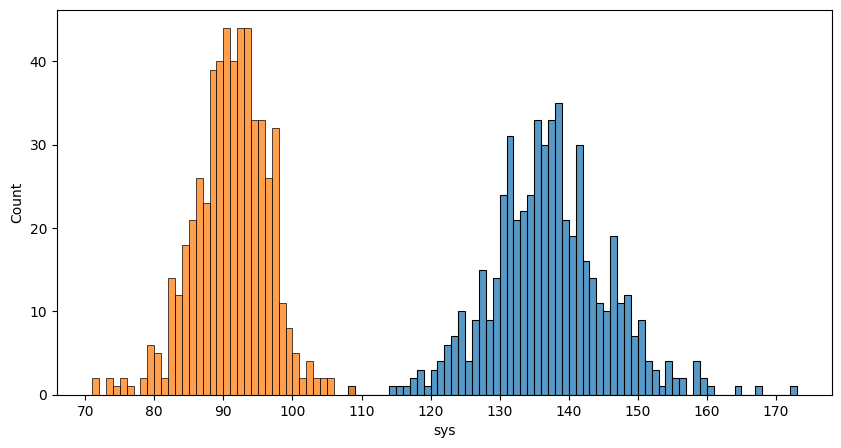

In [9]:
plt.figure(figsize=(10,5))
    
sns.histplot(data=df_daily['sys'], binwidth=1, legend=False)
sns.histplot(data=df_daily['dia'], binwidth=1, legend=False)
# plt.xticks(range(int(min(df_daily['dia']-10)), 171, 10))
plt.xticks(range(70,180,10))
plt.show()

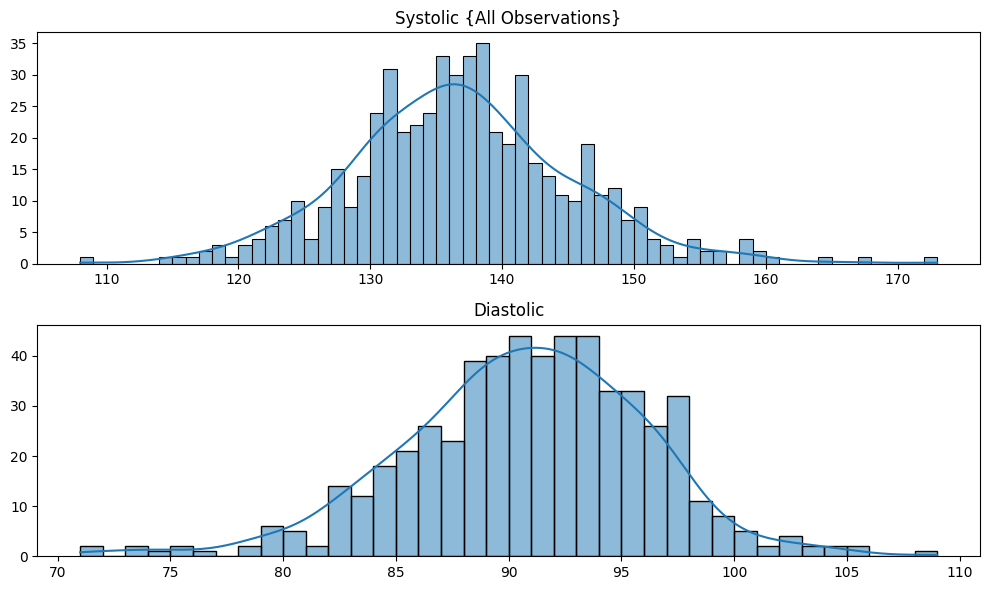

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# top fig
sns.histplot(data=df_daily['sys'], binwidth=1, legend=False, ax=axs[0], kde=True)
axs[0].set_title('Systolic {All Observations}')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

# 2nd fig
sns.histplot(data=df_daily['dia'], binwidth=1, legend=False, ax=axs[1], kde=True)
axs[1].set_title('Diastolic')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [11]:
# Tukey EDA Test...
df_daily[['sys', 'dia']].describe().T

,count,mean,std,min,25%,50%,75%,max
sys,549.0,136.715847,8.435854,108.0,131.0,136.0,141.0,173.0
dia,549.0,90.601093,5.375607,71.0,88.0,91.0,94.0,109.0


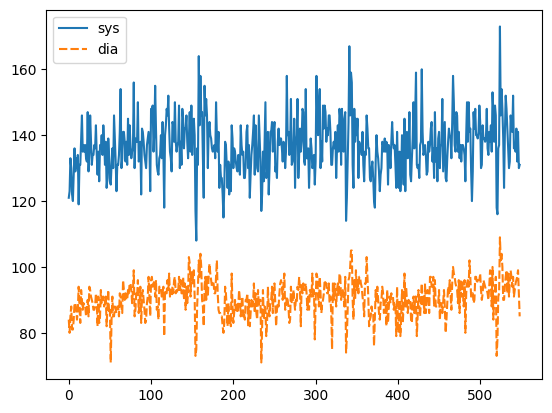

In [12]:
sns.lineplot(data=df_daily[['sys', 'dia']]);

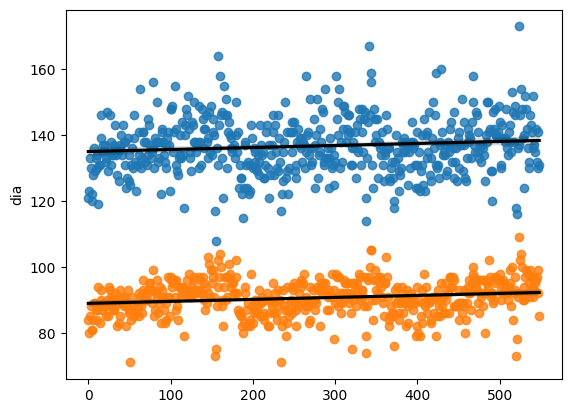

In [13]:
sns.regplot(x=df_daily.index, y = 'sys', data=df_daily, line_kws={'color':'black'})
sns.regplot(x=df_daily.index, y = 'dia', data=df_daily, line_kws={'color':'black'}); 

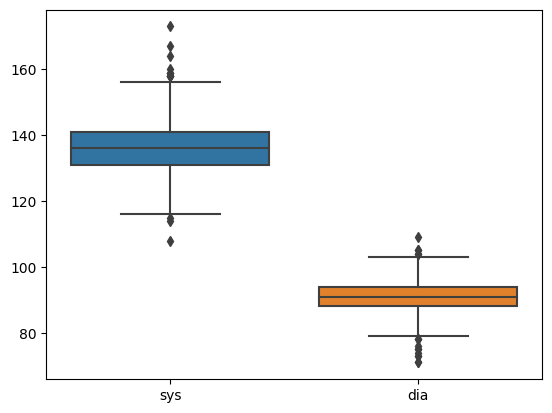

In [14]:
sns.boxplot(data=df_daily[['sys', 'dia']]);

In [15]:
df_summary = df_daily.drop('index', axis = 1)
df_summary = df_summary.groupby(['Date', 'DoW']).mean().round().astype(int).reset_index()
df_summary

,Date,DoW,sys,dia
0,2023-04-08,Saturday,124,85
1,2023-04-09,Sunday,127,84
2,2023-04-10,Monday,130,86
3,2023-04-11,Tuesday,130,86
4,2023-04-12,Wednesday,124,83
...,...,...,...,...
178,2023-10-03,Tuesday,136,94
179,2023-10-04,Wednesday,143,99
180,2023-10-05,Thursday,141,99
181,2023-10-06,Friday,134,92


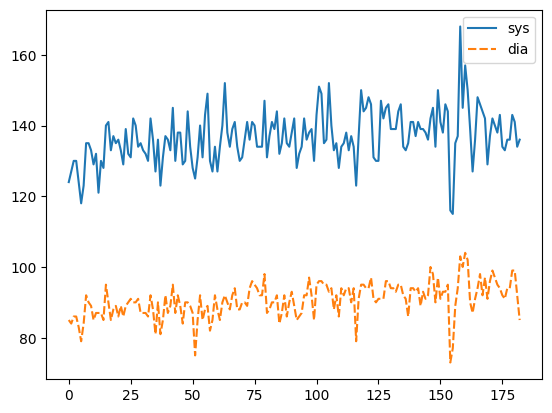

In [16]:
sns.lineplot(data=df_summary);

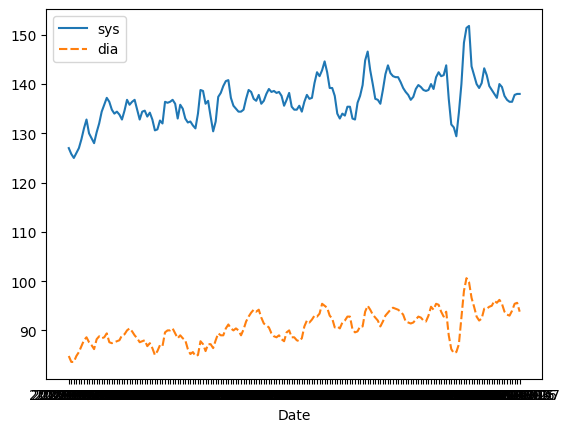

In [17]:
rolling = df_summary[['Date', 'sys', 'dia']].set_index('Date').rolling(window=5).mean().dropna()
sns.lineplot(data=rolling);

In [18]:
lst_date = pd.to_datetime(df_summary['Date'].max())
thirty_days_ago = lst_date - pd.to_timedelta(30, unit='d')
# lst_date, thirty_days_ago

df_summary['Date'] = pd.to_datetime(df_summary['Date'])
# df_summary.info()

thirty_day_df = df_summary[df_summary['Date'] > thirty_days_ago]

sixty_days_ago = lst_date - pd.to_timedelta(60, unit='d')
# prior_thirty_days = 
#df_summary[(df_summary['Date'] > sixty_days_ago) & (df_summary['Date'] < thirty_days_ago)]
df_summary[(df_summary['Date'] > sixty_days_ago) & (df_summary['Date'] <= thirty_days_ago)]


,Date,DoW,sys,dia
123,2023-08-09,Wednesday,131,91
124,2023-08-10,Thursday,130,90
125,2023-08-11,Friday,130,91
126,2023-08-12,Saturday,147,91
127,2023-08-13,Sunday,142,91
128,2023-08-14,Monday,145,96
129,2023-08-15,Tuesday,146,96
130,2023-08-16,Wednesday,139,94
131,2023-08-17,Thursday,139,94
132,2023-08-18,Friday,139,93


In [19]:
df_summary.head(2)

,Date,DoW,sys,dia
0,2023-04-08,Saturday,124,85
1,2023-04-09,Sunday,127,84
